<a href="https://colab.research.google.com/github/cyruskimani/Titanic-Dataset-Survival-KNN-Prediction-and-Spam-Classification-using-Naive-Bayes/blob/main/Week_9_Moringa_Core_IP_Cyrus_Kimani_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification for Spam.

# Defining The Question

## a) Specifying the Question.

Overview 

Spam messages are considered to be junk or illegitimate messages, as compared to genuine or legitimate messages. This project seeks to construct a spam filter which can be used to classify text messages as ham or spam.

Research Question

Build a model that determines whether or not a message is spam or not.


## b) Defining the Metrics for Success.

The Accuracy score,f1 score, Precision and Confusion Matrix will be used to evaluate the prediction of the of models.


## c) Understanding the context.

Spam messages are unwanted messages sent from unknown users or containing unsolicited information.

This exercise focuses on spam messages and seeks to create a model which classifies messages as spam or ham.


## d) Recording the Experimental Design.

The experimental design for this project will be composed of Exploratory Data Analysis and Classification Models as shown below.

Exploratory Data Analysis.

* Univariate Analysis.

Classification

* Naive Bayes Classifier



# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pydataset 

# Loading the dataset.

In [3]:
#Read the dataset
from pydataset import data
spam=pd.read_csv('/content/drive/MyDrive/Moringa Core Module 2 Regression/spambase.data',header=None)
spam.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
1020,0.05,0.05,0.4,0.0,0.34,0.0,0.0,0.0,0.57,0.05,0.0,0.28,0.11,0.0,0.0,0.17,0.0,0.0,1.09,0.05,0.92,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.05,0.0,0.0,0.0,0.019,0.099,0.0,0.099,0.079,0.009,4.906,95,1310,1
1351,0.00,0.00,0.0,0.0,1.01,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.05,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.088,0.0,0.000,0.088,0.000,6.718,33,215,1


## Information about the dataset.

In [4]:
# Previewing the top of the smap dataframe
spam.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.0,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.0,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [5]:
# Previewing the bottom of the spam dataframe
spam.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4599,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.0,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.0,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# Checking the size of the spam dataset.
print('The spam dataframe has:(rows,columns)=',spam.shape)

The spam dataframe has:(rows,columns)= (4601, 58)


The spam dataframe contains 4601 rows and 58 columns.

In [7]:
# Checking Columns and Datatypes in the train Dataset.
print('Information of the spam Dataset')
print('*' *40)
spam.info()

Information of the spam Dataset
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  2

*The dataset contains 4601 rows, 58 columns and the respective datatypes for each column as shown above.*

In [8]:
# Obtaining a description of the dataset.
spam.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

## Data Cleaning.

### Duplicate and Null Values.

In [9]:
# Checking for duplicates.
print('Number of duplicated records = ',spam.duplicated().sum())

Number of duplicated records =  391


391 duplicates were found in the spam dataframe.

In [10]:
# Previewing the duplicated data.
print('The number of duplicated records is=',len(spam[spam.duplicated()]))
spam[spam.duplicated()].head()

The number of duplicated records is= 391


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,2.59,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,2.59,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1


In [11]:
# Dropping one copy of duplicates
spam.drop_duplicates(keep='first', inplace = True)
print('Duplicated records in the dataframe:',spam.duplicated().any())

Duplicated records in the dataframe: False


In [12]:
# Checking for null values.
spam.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

No Null values were found in the spam dataframe.

# Exploratory Data Analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


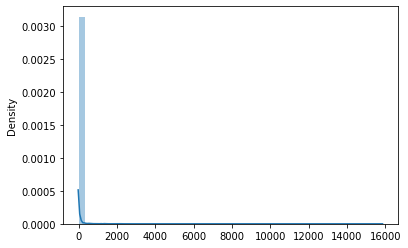

In [13]:
# Getting the distribution of the data 
sns.distplot(spam)

In [14]:
# Kurtosis 
print(spam.kurt())
print(spam.kurt().sum())

0       54.351406
1      306.685973
2       12.941447
3      788.370058
4       37.064801
5       71.603267
6       76.381647
7      167.550219
8       48.011373
9      162.539033
10      34.656119
11      12.096068
12      82.596297
13     219.645155
14      69.493809
15     157.691742
16      43.514184
17      48.157461
18       4.998066
19     424.685771
20       8.094203
21      99.666089
22      49.119948
23     340.175773
24      43.182446
25      63.072871
26     111.099824
27      58.669248
28     189.408655
29      49.105349
30     302.369897
31     128.295774
32     290.736221
33     126.437150
34     491.541633
35      79.988044
36      40.887964
37     836.229272
38     205.959198
39     101.120159
40     166.261694
41     108.994652
42      73.795377
43     449.017717
44     122.067523
45     150.119541
46     431.309247
47     492.146945
48     200.449787
49     404.370138
50     664.620378
51     579.438464
52     188.462692
53    1238.321018
54     614.399885
55    1471

In [15]:
# Skew
print(spam.skew())
print(spam.skew().sum())

0      5.869855
1     13.464664
2      2.980623
3     27.209539
4      4.696946
5      6.122653
6      6.808707
7      9.734232
8      5.284306
9      8.568579
10     5.078281
11     2.828005
12     6.889952
13    11.564142
14     7.513375
15     9.387745
16     5.567668
17     5.453867
18     1.524251
19    15.430174
20     2.245707
21     9.541533
22     5.859524
23    15.556682
24     5.638834
25     6.297471
26     9.481582
27     6.517998
28    11.683591
29     6.380831
30    13.514852
31    10.432463
32    13.069355
33    10.339838
34    16.001762
35     7.358775
36     5.126620
37    27.078694
38    11.762303
39     9.101847
40    11.468806
41     9.185157
42     7.408226
43    18.196824
44     8.917866
45    10.077034
46    19.298485
47    18.871757
48    13.355885
49    14.002666
50    21.271982
51    18.337278
52    10.608970
53    31.500180
54    22.760655
55    31.205495
56     8.801641
57     0.413450
dtype: float64
640.6501835738288


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


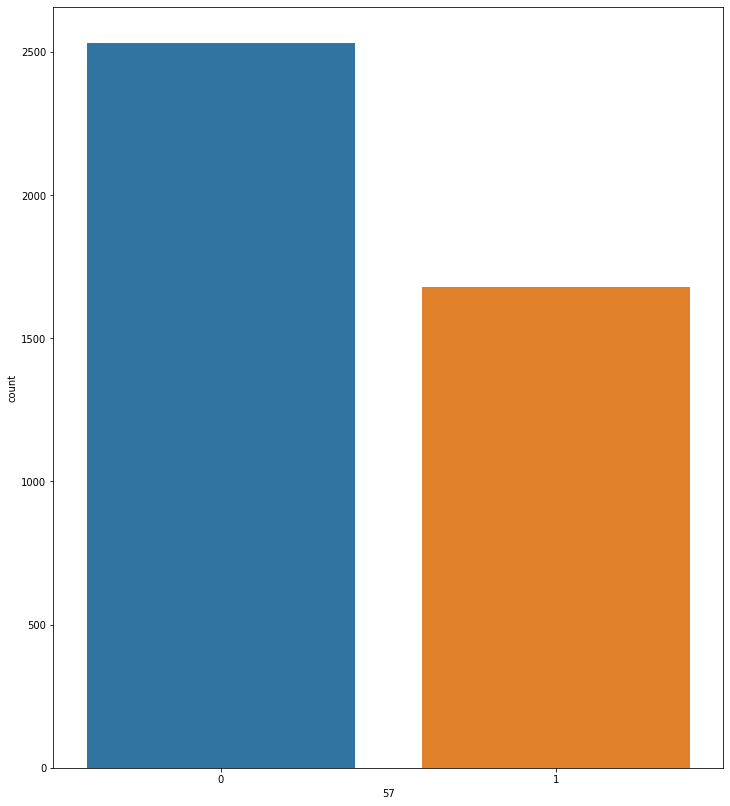

In [16]:
# Visualizing the spam column
plt.figure(figsize=(12,14))
sns.countplot(spam.iloc[:,57])

The number of non spam messages was higher than spam messages.

# Naive Bayes Model.

In [17]:
# Load libraries
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [18]:
# Defining X and y.
columns = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,17, 18, 19, 20,
           21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
           41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Training the model
classifier = GaussianNB()  
model = classifier.fit(X_train, y_train) 

# Predicting our test predictors
predicted = model.predict(X_test)

In [21]:
#Making predictions
y_pred = model.predict(X_test)
gbpred= pd.DataFrame({'actual': y_test, 'predicted': y_pred})
gbpred.head()

,actual,predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0


In [22]:
# Measuring the accuracy of the model
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

Accuracy score =: 0.8123515439429929 ,f1 score = 0.8073170731707316
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       495
           1       0.70      0.95      0.81       347

    accuracy                           0.81       842
   macro avg       0.83      0.83      0.81       842
weighted avg       0.85      0.81      0.81       842



array([[353, 142],
       [ 16, 331]])

* The initial model for Naive Bayes had an accuracy of 81.2% and an F1 score of 80.7%.

* The Confusion Matrix suggested 353 and 331 accurate predictions and, 142 and 16 inaccurate predictions.

In [83]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1876484560570071
Mean Squared Error: 0.1876484560570071
Root Mean Squared Error: 0.4331840902630279


## 70 - 30 Split.

In [84]:
# Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
classifier = GaussianNB()  
model = classifier.fit(X_train, y_train) 

# Predicting our test predictors
predicted = model.predict(X_test)

#Making predictions
y_pred = model.predict(X_test)
gbpred= pd.DataFrame({'actual': y_test, 'predicted': y_pred})
gbpred.head()

,actual,predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0


In [85]:
# Measuring the accuracy of the model
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

Accuracy score =: 0.8297703879651623 ,f1 score = 0.826192400970089
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



array([[537, 200],
       [ 15, 511]])

* The 70-30 split model for Naive Bayes had an accuracy of 82.9% and an F1 score of 82.6%.

* The Confusion Matrix suggested 537 and 511 accurate predictions and, 200 and 15 inaccurate predictions.

In [86]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1702296120348377
Mean Squared Error: 0.1702296120348377
Root Mean Squared Error: 0.41258891409590454


## 60 - 40 Split.

In [87]:
# Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
classifier = GaussianNB()  
model = classifier.fit(X_train, y_train) 

# Predicting our test predictors
predicted = model.predict(X_test)

#Making predictions
y_pred = model.predict(X_test)
gbpred= pd.DataFrame({'actual': y_test, 'predicted': y_pred})
gbpred.head()

,actual,predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0


In [88]:
# Measuring the accuracy of the model
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

Accuracy score =: 0.8200712589073634 ,f1 score = 0.814678899082569
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       994
           1       0.70      0.97      0.81       690

    accuracy                           0.82      1684
   macro avg       0.84      0.84      0.82      1684
weighted avg       0.86      0.82      0.82      1684



array([[715, 279],
       [ 24, 666]])

* The 60-40 split model for Naive Bayes had an accuracy of 82.0% and an F1 score of 81.5%.

* The Confusion Matrix suggested 715 and 666 accurate predictions and, 279 and 24 inaccurate predictions.

In [89]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17992874109263657
Mean Squared Error: 0.17992874109263657
Root Mean Squared Error: 0.4241800809710854


The 70-30 split generated the best model compared to the other models.

## Hyperparameter tuning.

In [90]:
# Getting best parameters

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=0)
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.2s finished


{'var_smoothing': 0.0004328761281083057}

## 70 - 30 Split with Hyperparameter Tuning.

In [91]:
# Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
classifier = GaussianNB(var_smoothing= 0.0001)  
model = classifier.fit(X_train, y_train) 

# Predicting our test predictors
predicted = model.predict(X_test)

#Making predictions
y_pred = model.predict(X_test)
gbpred= pd.DataFrame({'actual': y_test, 'predicted': y_pred})
gbpred.head()

,actual,predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0


In [92]:
# Measuring the accuracy of the model
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

Accuracy score =: 0.8297703879651623 ,f1 score = 0.826192400970089
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



array([[537, 200],
       [ 15, 511]])

In [93]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1702296120348377
Mean Squared Error: 0.1702296120348377
Root Mean Squared Error: 0.41258891409590454


* The 70-30 split model with hyperparameter tuning for KNN had an accuracy of 82.9% and an F1 score of 82.6%.

* The Confusion Matrix suggested 537 and 511 accurate predictions and, 200 and 15 inaccurate predictions.

* There was no improvement with hyperparameter tuning. It is recommended to use the 70-30 split model

## Challenging the Solution.

In [94]:
# Reviewing the Solution 
# compare algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Declaring our X and y variables
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.926364 (0.011940)
LDA: 0.889550 (0.008462)
KNN: 0.790971 (0.016215)
CART: 0.905286 (0.014556)
RF: 0.947749 (0.013659)
GBC: 0.939729 (0.011720)
NB: 0.826908 (0.017153)
SVM: 0.812354 (0.017671)


Conclusion

The best model for classifying messages as spam would be the Random Forest which would have an accuracy of 94.8% which is higher than the Naive Bayes classifier of 82.9%.